In [1]:
# 파일 이름 : ch02kmdb/kmdb12.visualization.ipynb
import pandas as pd
dataInFolder = './../data/'

In [2]:
# 컬럼명 한글로 바꾸기

kmdb = pd.read_csv(dataInFolder + 'kmdb_get_movie_list_20231103.csv')
column_dict = {
     'movieCd':'영화코드', 'movieNm':'영화명국문', 'movieNmEn':'영화명(영문)', 
   'prdtYear':'제작연도', 'openDt':'개봉일', 'typeNm':'영화유형', 
   'prdtStatNm':'제작상태', 'nationAlt':'제작국가(전체)', 'genreAlt':'영화장르(전체)', 
   'repNationNm':'대표 제작 국가', 'repGenreNm':'대표 장르'
}
kmdb = kmdb.rename(columns = column_dict)
print(kmdb.columns)
kmdb.head()

Index(['영화코드', '영화명국문', '영화명(영문)', '제작연도', '개봉일', '영화유형', '제작상태', '제작국가(전체)',
       '영화장르(전체)', '대표 제작 국가', '대표 장르'],
      dtype='object')


,영화코드,영화명국문,영화명(영문),제작연도,개봉일,영화유형,제작상태,제작국가(전체),영화장르(전체),대표 제작 국가,대표 장르
0,20230966,사채소년,NaN,2023.0,NaN,장편,개봉예정,한국,액션,한국,액션
1,19820019,만추 리마스터링,Late Autumn,2010.0,20110217.0,장편,개봉,"한국,미국,홍콩",멜로/로맨스,한국,멜로/로맨스
2,20070458,냉정과 열정사이,Between Calm And Passion,2001.0,20031010.0,장편,개봉,일본,"멜로/로맨스,드라마",일본,멜로/로맨스
3,20226500,달짝지근해: 7510,HONEYSWEET,2022.0,20230815.0,장편,개봉,한국,코미디,한국,코미디
4,20235004,여귀교- 저주를 부르는 게임,The Bridge Curse : Ritua,2023.0,NaN,장편,개봉예정,대만,공포(호러),대만,공포(호러)


In [3]:
# 기존 컬럼에서 슬라이싱한 데이터로 컬럼 추가

openYear = [str(item)[0:4] for item in kmdb['개봉일']] # 문자로 변환, 슬라이싱(순서가 있는(시퀀스) 문자열, 리스트, 튜폴은 인덱싱, 슬라이싱이 가능)
kmdb['개봉년도'] = openYear
kmdb['개봉년월'] = [str(item)[0:6] for item in kmdb['개봉일']]
kmdb.head()

,영화코드,영화명국문,영화명(영문),제작연도,개봉일,영화유형,제작상태,제작국가(전체),영화장르(전체),대표 제작 국가,대표 장르,개봉년도,개봉년월
0,20230966,사채소년,NaN,2023.0,NaN,장편,개봉예정,한국,액션,한국,액션,nan,nan
1,19820019,만추 리마스터링,Late Autumn,2010.0,20110217.0,장편,개봉,"한국,미국,홍콩",멜로/로맨스,한국,멜로/로맨스,2011,201102
2,20070458,냉정과 열정사이,Between Calm And Passion,2001.0,20031010.0,장편,개봉,일본,"멜로/로맨스,드라마",일본,멜로/로맨스,2003,200310
3,20226500,달짝지근해: 7510,HONEYSWEET,2022.0,20230815.0,장편,개봉,한국,코미디,한국,코미디,2023,202308
4,20235004,여귀교- 저주를 부르는 게임,The Bridge Curse : Ritua,2023.0,NaN,장편,개봉예정,대만,공포(호러),대만,공포(호러),nan,nan


In [4]:
# 컬럼 재배치 작업
column01 = ['영화코드', '영화명국문', '영화명(영문)', '개봉년도', '개봉년월', '개봉일']
column02 = ['대표 제작 국가', '대표 장르', '영화유형', '제작상태', '영화장르(전체)', '제작국가(전체)', '제작연도']

myordering = column01 + column02

# 누락된 컬럼이 없는 지 확인 (set 사용)
result = set(kmdb.columns) == set(myordering)
result

True

In [5]:
kmdb = kmdb[myordering]
kmdb.head()

,영화코드,영화명국문,영화명(영문),개봉년도,개봉년월,개봉일,대표 제작 국가,대표 장르,영화유형,제작상태,영화장르(전체),제작국가(전체),제작연도
0,20230966,사채소년,NaN,nan,nan,NaN,한국,액션,장편,개봉예정,액션,한국,2023.0
1,19820019,만추 리마스터링,Late Autumn,2011,201102,20110217.0,한국,멜로/로맨스,장편,개봉,멜로/로맨스,"한국,미국,홍콩",2010.0
2,20070458,냉정과 열정사이,Between Calm And Passion,2003,200310,20031010.0,일본,멜로/로맨스,장편,개봉,"멜로/로맨스,드라마",일본,2001.0
3,20226500,달짝지근해: 7510,HONEYSWEET,2023,202308,20230815.0,한국,코미디,장편,개봉,코미디,한국,2022.0
4,20235004,여귀교- 저주를 부르는 게임,The Bridge Curse : Ritua,nan,nan,NaN,대만,공포(호러),장편,개봉예정,공포(호러),대만,2023.0


In [6]:
kmdb['대표 장르'].unique()

array(['액션', '멜로/로맨스', '코미디', '공포(호러)', '드라마', nan, '성인물(에로)', 'SF',
       '애니메이션', '기타', '판타지', '범죄', '공연', '스릴러', '다큐멘터리', '미스터리', '뮤지컬',
       '전쟁', '어드벤처', '가족', '서부극(웨스턴)', '사극'], dtype=object)

In [7]:
genre_filter = ['드라마', '코미디', '판타지', '액션']
genre_result = kmdb[kmdb['대표 장르'].isin(genre_filter)]
genre_result['대표 장르'].unique()

array(['액션', '코미디', '드라마', '판타지'], dtype=object)

In [8]:
chartData = genre_result['대표 장르'].value_counts()
chartData.to_frame()

,count
대표 장르,
드라마,22003
액션,6176
코미디,5277
판타지,588


In [9]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic') # 한글이 안 꺠지도록 맑은 고딕으로 설정

<Axes: ylabel='count'>

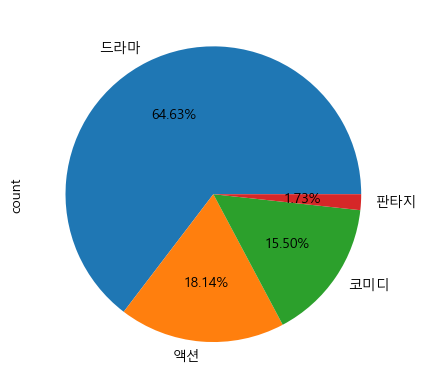

In [10]:
chartData.plot(kind = 'pie', autopct = '%1.2f%%')

In [11]:
genre_filter = ['드라마', '애니메이션', '범죄', '코미디', '스릴러']
genre_result = kmdb[kmdb['대표 장르'].isin(genre_filter)]
genre_result['대표 장르'].unique()

array(['코미디', '드라마', '애니메이션', '범죄', '스릴러'], dtype=object)

In [12]:
# groupby('a')['b'] : a로 그룹핑 해주세요.
genreGrouping = genre_result.groupby('대표 장르')['대표 장르']
genreChart = genreGrouping.count().sort_values() # b에 대한 갯수를 구해 주세요.
genreChart.to_frame()

,대표 장르
대표 장르,
범죄,1523
스릴러,1870
코미디,5277
애니메이션,8638
드라마,22003


<Axes: xlabel='대표 장르'>

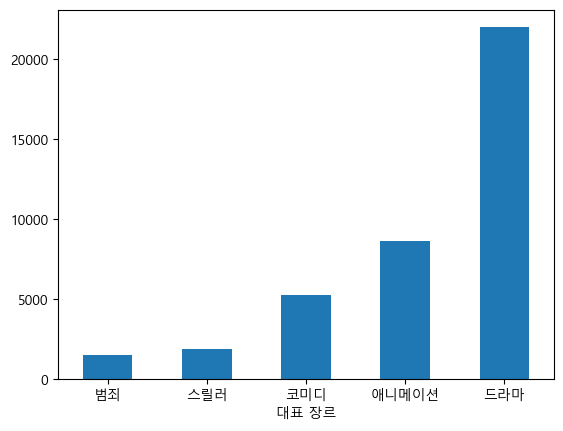

In [13]:
genreChart.plot(kind = 'bar', rot = 0)

In [14]:
filter_nation = ['미국', '일본', '중국', '한국']
nation_name_data = kmdb[kmdb['대표 제작 국가'].isin(filter_nation)]
nation_name_data['대표 제작 국가'].unique()

array(['한국', '일본', '미국', '중국'], dtype=object)

In [15]:
nation_name_grouping = nation_name_data.groupby('대표 제작 국가')['대표 제작 국가']
nation_name_chart = nation_name_grouping.count().sort_index(ascending=False) # 색인 기반 오름차 정렬
nation_name_chart.to_frame()

,대표 제작 국가
대표 제작 국가,
한국,33049
중국,1951
일본,11963
미국,15761


<Axes: ylabel='대표 제작 국가'>

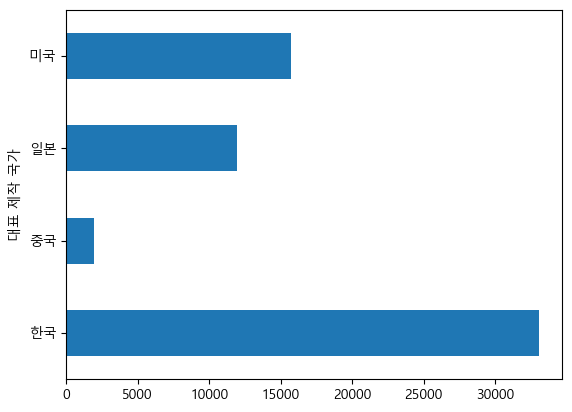

In [16]:
nation_name_chart.plot(kind='barh', rot=0)

In [17]:
nation = ['한국', '미국', '일본']
genre = ['범죄', '코미디', '스릴러', '뮤지컬']

result = kmdb[kmdb['대표 제작 국가'].isin(nation)]
result = result[result['대표 장르'].isin(genre)]

In [18]:
# groupby('a')['b'] : a로 그룹핑 해주세요.

resultGroup = result.groupby(['대표 제작 국가', '대표 장르'])['대표 제작 국가']
barChartData = resultGroup.count().to_frame()
barChartData = barChartData.rename(columns={'대표 제작 국가':'cnt'})
barChartData.reset_index()

,대표 제작 국가,대표 장르,cnt
0,미국,뮤지컬,88
1,미국,범죄,670
2,미국,스릴러,787
3,미국,코미디,2054
4,일본,범죄,64
5,일본,스릴러,79
6,일본,코미디,241
7,한국,뮤지컬,73
8,한국,범죄,205
9,한국,스릴러,422


In [19]:
barChart = pd.pivot_table(barChartData, index='대표 제작 국가', columns='대표 장르', values='cnt', aggfunc='mean') # aggfunc : default는 평균
barChart

대표 장르,뮤지컬,범죄,스릴러,코미디
대표 제작 국가,,,,
미국,88.0,670.0,787.0,2054.0
일본,NaN,64.0,79.0,241.0
한국,73.0,205.0,422.0,969.0


Text(0.5, 1.0, '국가별 장르별 다변량 수직 막대 그래프')

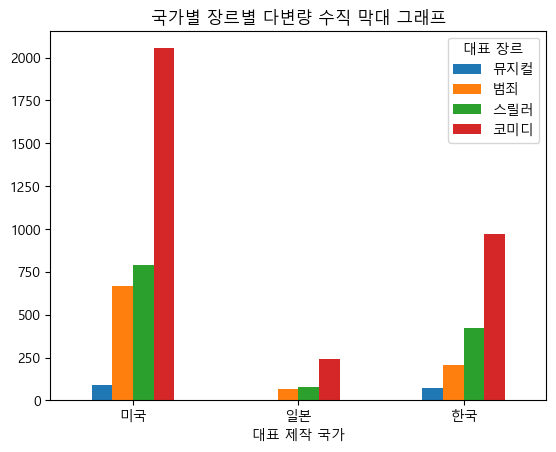

In [20]:
barChart.plot(kind='bar', rot=0)
plt.title('국가별 장르별 다변량 수직 막대 그래프')

Text(0.5, 1.0, '장르별 국가별 다변량 수직 막대 그래프')

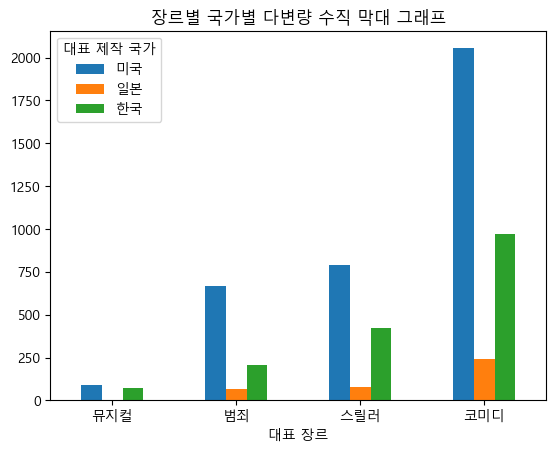

In [21]:
barChart.T.plot(kind='bar', rot=0) # .T 가 행렬을 바꿔준다.
plt.title('장르별 국가별 다변량 수직 막대 그래프')

In [22]:
kmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98221 entries, 0 to 98220
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   영화코드      98221 non-null  object 
 1   영화명국문     98221 non-null  object 
 2   영화명(영문)   77583 non-null  object 
 3   개봉년도      98221 non-null  object 
 4   개봉년월      98221 non-null  object 
 5   개봉일       30020 non-null  float64
 6   대표 제작 국가  88822 non-null  object 
 7   대표 장르     85129 non-null  object 
 8   영화유형      92106 non-null  object 
 9   제작상태      97781 non-null  object 
 10  영화장르(전체)  86250 non-null  object 
 11  제작국가(전체)  88820 non-null  object 
 12  제작연도      94313 non-null  float64
dtypes: float64(2), object(11)
memory usage: 9.7+ MB


In [23]:
# sorted : 정렬을 수행하는 내장 함수
sorted(kmdb['개봉년월'].unique())

['191910',
 '191911',
 '192003',
 '192004',
 '192301',
 '192304',
 '192407',
 '192409',
 '192411',
 '192501',
 '192503',
 '192504',
 '192505',
 '192510',
 '192601',
 '192603',
 '192606',
 '192609',
 '192611',
 '192612',
 '192701',
 '192704',
 '192706',
 '192707',
 '192710',
 '192711',
 '192801',
 '192802',
 '192804',
 '192805',
 '192807',
 '192811',
 '192812',
 '192901',
 '192902',
 '192905',
 '193001',
 '193004',
 '193005',
 '193009',
 '193010',
 '193011',
 '193101',
 '193103',
 '193111',
 '193206',
 '193209',
 '193210',
 '193211',
 '193305',
 '193306',
 '193404',
 '193409',
 '193502',
 '193503',
 '193506',
 '193509',
 '193510',
 '193512',
 '193601',
 '193602',
 '193604',
 '193605',
 '193606',
 '193610',
 '193611',
 '193701',
 '193704',
 '193709',
 '193711',
 '193806',
 '194008',
 '194102',
 '194103',
 '194201',
 '194209',
 '194304',
 '194306',
 '194312',
 '194402',
 '194406',
 '194603',
 '194604',
 '194609',
 '194610',
 '194704',
 '194705',
 '194706',
 '194707',
 '194709',
 '194712',

In [31]:
# 2022년도와 2023년도만 필터링
year2022 = ['2022' + str(idx).zfill(2) for idx in range(1,13)] # .zfill() zero fill 
year2023 = ['2023' + str(idx).zfill(2) for idx in range(1,13)] # .zfill() zero fill 
myyear = year2022 + year2023 # 2개의 리스트를 합칠수 있다. 
recentKmdb = kmdb[kmdb['개봉년월'].isin(myyear)]
recentKmdb

,영화코드,영화명국문,영화명(영문),개봉년도,개봉년월,개봉일,대표 제작 국가,대표 장르,영화유형,제작상태,영화장르(전체),제작국가(전체),제작연도
3,20226500,달짝지근해: 7510,HONEYSWEET,2023,202308,20230815.0,한국,코미디,장편,개봉,코미디,한국,2022.0
5,20233367,앵그리 애니,Angry Annie,2023,202311,20231101.0,프랑스,드라마,장편,개봉,드라마,프랑스,2022.0
9,20234707,처제 속살 훔쳐보다가..,NaN,2023,202311,20231102.0,한국,성인물(에로),장편,개봉,성인물(에로),한국,2023.0
11,20235549,어게인 5년째 첫날밤,NaN,2023,202311,20231102.0,한국,NaN,장편,개봉,NaN,한국,NaN
12,20233744,시뮬런트,SIMULANT,2023,202311,20231102.0,미국,SF,장편,개봉,SF,미국,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14867,20210289,킬러 하이드,Hyde,2022,202201,20220106.0,미국,액션,장편,개봉,"액션,스릴러",미국,2021.0
14879,20210672,피드백,Feedback,2022,202201,20220105.0,스페인,공포(호러),장편,개봉,"공포(호러),스릴러",스페인,2018.0
14880,20218764,씽2게더,Sing 2,2022,202201,20220105.0,미국,애니메이션,장편,개봉,애니메이션,미국,2021.0
14881,20212486,스물여덟 마흔아홉,NaN,2022,202201,20220104.0,한국,성인물(에로),장편,개봉,성인물(에로),한국,2018.0


In [32]:
sorted(recentKmdb['개봉년월'].unique())

['202201',
 '202202',
 '202203',
 '202204',
 '202205',
 '202206',
 '202207',
 '202208',
 '202209',
 '202210',
 '202211',
 '202212',
 '202301',
 '202302',
 '202303',
 '202304',
 '202305',
 '202306',
 '202307',
 '202308',
 '202309',
 '202310',
 '202311']

In [45]:
openMonth = recentKmdb.groupby('개봉년월')['개봉년월']
openChart = openMonth.count()
openChart.to_frame()

,개봉년월
개봉년월,
202201,154
202202,117
202203,162
202204,157
202205,175
202206,177
202207,140
202208,140
202209,136


([<matplotlib.axis.XTick at 0x249f3c45550>,
 [Text(0, 0, '202201'),
  Text(1, 0, '202202'),
  Text(2, 0, '202203'),
  Text(3, 0, '202204'),
  Text(4, 0, '202205'),
  Text(5, 0, '202206'),
  Text(6, 0, '202207'),
  Text(7, 0, '202208'),
  Text(8, 0, '202209'),
  Text(9, 0, '202210'),
  Text(10, 0, '202211'),
  Text(11, 0, '202212'),
  Text(12, 0, '202301'),
  Text(13, 0, '202302'),
  Text(14, 0, '202303'),
  Text(15, 0, '202304'),
  Text(16, 0, '202305'),
  Text(17, 0, '202306'),
  Text(18, 0, '202307'),
  Text(19, 0, '202308'),
  Text(20, 0, '202309'),
  Text(21, 0, '202310'),
  Text(22, 0, '202311')])

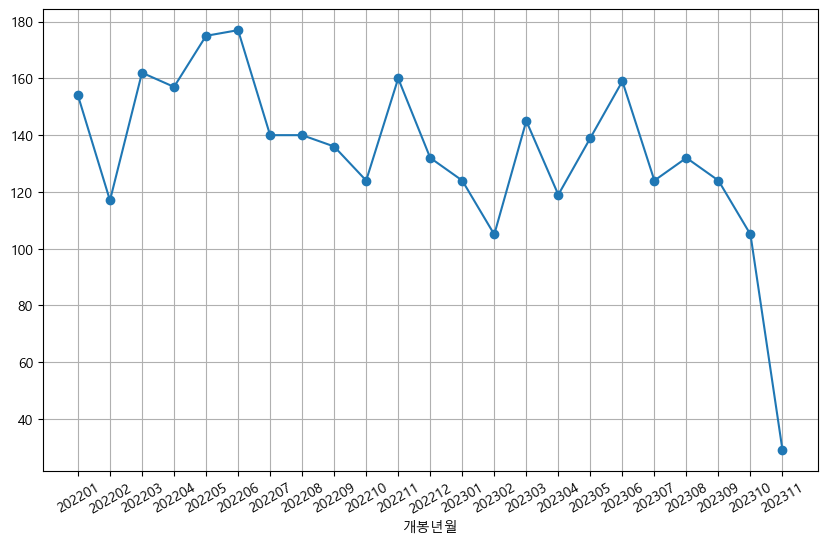

In [47]:
openChart.plot(kind='line', grid=True, figsize=(10,6), marker='o', rot=30)
plt.xticks(range(len(openChart.index)), openChart.index) # 축 좌표 채워넣기

In [61]:
nationList = recentKmdb['대표 제작 국가'].unique()
nationList

array(['한국', '프랑스', '미국', '일본', '호주', '중국', '홍콩', '기타', '스페인', '영국',
       '우크라이나', '멕시코', '독일', '대만', '이탈리아', '폴란드', '칠레', '벨기에', '노르웨이',
       '네덜란드', '러시아', '헝가리', '캐나다', '체코', '브라질', '핀란드', '아일랜드', '인도네시아',
       '아르헨티나', '인도', '이스라엘', '덴마크', '오스트리아 ', '스위스', '아이슬란드', '이집트',
       '베트남', '에스토니아', '필리핀', '페루', '카자흐스탄', '루마니아', '우루과이', '뉴질랜드',
       '남아프리카공화국'], dtype=object)

In [55]:
region_txt = open(dataInFolder + 'region.txt', mode= 'rt', encoding='UTF-8')
region_dict = dict()
region_list = region_txt.readlines() # s가 붙으면 한줄 씩이 아니라 한꺼면에 읽어 온다.

for oneline in region_list:
    nation = oneline.replace('\n', '').split(':')
    region_dict[nation[0]] = nation[1]
# end for

region_dict

{'일본': '아시아',
 '한국': '아시아',
 '중국': '아시아',
 '영국': '유럽',
 '미국': '북중미',
 '프랑스': '유럽',
 '캐나다': '유럽',
 '이스라엘': '아시아',
 '독일': '유럽',
 '스페인': '유럽',
 '덴마크': '유럽',
 '벨기에': '유럽',
 '대만': '아시아',
 '홍콩': '아시아',
 '오스트리아': '유럽',
 '기타': '기타',
 '러시아': '유럽',
 '호주': '오세아니아',
 '핀란드': '유럽',
 '노르웨이': '유럽',
 '스위스': '유럽',
 '아일랜드': '유럽',
 '네덜란드': '유럽',
 '아이슬란드': '유럽',
 '헝가리': '유럽',
 '이집트': '아프리카',
 '브라질': '남미',
 '인도네시아': '아시아',
 '베트남': '아시아',
 '에스토니아': '유럽',
 '필리핀': '아시아',
 '우크라이나': '유럽',
 '페루': '남미',
 '카자흐스탄': '아시아',
 '루마니아': '유럽',
 '이탈리아': '유럽',
 '우루과이': '남미',
 '뉴질랜드': '오세아니아',
 '남아프리카공화국': '아프리카',
 '폴란드': '유럽',
 '멕시코': '남미',
 '칠레': '남미',
 '체코': '유럽',
 '아르헨티나': '남미',
 '인도': '아시아'}

In [58]:
# '대표 제작 국가'를 이용하여 사전에서 '대륙' 이름을 찾아서 파생 컬럼 '대륙'에 추가합니다.
recentKmdb.loc[:, '대륙'] = recentKmdb.loc[:, '대표 제작 국가'].apply(lambda nation : region_dict.get(nation, nation))
recentKmdb.loc[:, ['대표 제작 국가', '대륙']].head()

C:\Users\ict-08\AppData\Local\Temp\ipykernel_17528\2148217747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recentKmdb.loc[:, '대륙'] = recentKmdb.loc[:, '대표 제작 국가'].apply(lambda nation : region_dict.get(nation, nation))


,대표 제작 국가,대륙
3,한국,아시아
5,프랑스,유럽
9,한국,아시아
11,한국,아시아
12,미국,북중미


In [62]:
# 상위 3개 대륙만 추출 하기
nTop = 3
continent = recentKmdb['대륙'].value_counts().to_frame()
continent = continent.nlargest(nTop, 'count') # 상위 n개 뽑기
continent

,count
대륙,
아시아,2527
북중미,276
유럽,233


array([<Axes: ylabel='count'>], dtype=object)

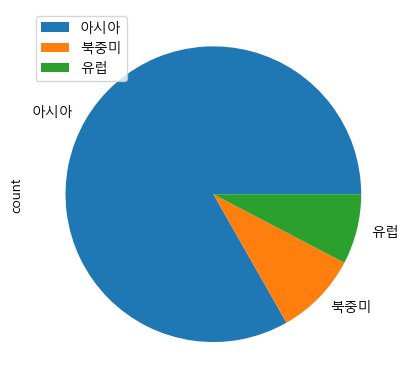

In [65]:
continent.plot(kind='pie', subplots=True)